In [230]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsClassifier

In [229]:
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

 Źródło danych: https://www.kaggle.com/datasets/thedevastator/the-unsolved-mysteries-of-scooby-doo?select=scoobydoo.csv

Baza danych zawiera różne informacje dotyczące wszystkich odcinków Scooby-Doo oraz filmów. 
Przykładowe kolumny tyczą się oceny odcinka, zaangażowania, kto złapał potwora, kto został schwytany, kto dał Scooby-chrupka, kto ściągnał maskę potworowi.

## Przygotowanie danych

Zmiana ustawień, aby wyświetlać wszystkie wiersze oraz kolumny.

In [37]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [38]:
scooby_doo=pd.read_csv(r"C:\Users\olaki\Documents\studia\semestr 5\scooby doo\scoobydoo.csv", index_col=0)
scooby_doo.head()

,index,series_name,network,season,title,imdb,engagement,date_aired,run_time,format,monster_name,monster_gender,monster_type,monster_subtype,monster_species,monster_real,monster_amount,caught_fred,caught_daphnie,caught_velma,caught_shaggy,caught_scooby,captured_fred,captured_daphnie,captured_velma,captured_shaggy,captured_scooby,unmask_fred,unmask_daphnie,unmask_velma,unmask_shaggy,unmask_scooby,snack_fred,snack_daphnie,snack_velma,snack_shaggy,snack_scooby,unmask_other,caught_other,caught_not,trap_work_first,setting_terrain,setting_country_state,suspects_amount,non_suspect,arrested,culprit_name,culprit_gender,culprit_amount,motive,if_it_wasnt_for,and_that,door_gag,number_of_snacks,split_up,another_mystery,set_a_trap,jeepers,jinkies,my_glasses,just_about_wrapped_up,zoinks,groovy,scooby_doo_where_are_you,rooby_rooby_roo,batman,scooby_dum,scrappy_doo,hex_girls,blue_falcon,fred_va,daphnie_va,velma_va,shaggy_va,scooby_va
level_0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1,"Scooby Doo, Where Are You!",CBS,1,What a Night for a Knight,8.1,556.0,1969-09-13,21,TV Series,Black Knight,Male,Possessed Object,Suit,Object,False,1,False,False,False,True,True,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,NaN,Urban,United States,2,False,True,Mr. Wickles,Male,1,Theft,NaN,NaN,False,2,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,False,False,False,False,False,Frank Welker,Stefanianna Christopherson,Nicole Jaffe,Casey Kasem,Don Messick
1,2,"Scooby Doo, Where Are You!",CBS,1,A Clue for Scooby Doo,8.1,479.0,1969-09-20,22,TV Series,Ghost of Cptn. Cuttler,Male,Ghost,Suit,Human,False,1,False,False,False,True,False,True,True,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,Coast,United States,2,True,True,Cptn. Cuttler,Male,1,Theft,NaN,NaN,False,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,1.0,0.0,False,False,False,False,False,Frank Welker,Stefanianna Christopherson,Nicole Jaffe,Casey Kasem,Don Messick
2,3,"Scooby Doo, Where Are You!",CBS,1,Hassle in the Castle,8.0,455.0,1969-09-27,21,TV Series,Phantom,Male,Ghost,Phantom,Human,False,1,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,Island,United States,0,True,True,Bluestone the Great,Male,1,Treasure,NaN,NaN,False,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,False,False,False,False,False,Frank Welker,Stefanianna Christopherson,Nicole Jaffe,Casey Kasem,Don Messick
3,4,"Scooby Doo, Where Are You!",CBS,1,Mine Your Own Business,7.8,426.0,1969-10-04,21,TV Series,Miner 49'er,Male,Ancient,Miner,Human,False,1,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,True,Cave,California,2,False,True,Hank,Male,1,Natural Resource,NaN,NaN,False,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,False,False,False,False,False,Frank Welker,Stefanianna Christopherson,Nicole Jaffe,Casey Kasem,Don Messick
4,5,"Scooby Doo, Where Are You!",CBS,1,Decoy for a Dognapper,7.5,391.0,1969-10-11,21,TV Series,Indian Witch Doctor,Female,Ancient,Witch Doctor,Human,False,1,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,True,False,False,False,False,False,False,NaN,Desert,United States,1,False,True,Buck Master,Male,1,Competition,NaN,NaN,False,2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,False,False,False,False,False,Frank Welker,Stefanianna Christopherson,Nicole Jaffe,Casey Kasem,Don Messick


Usunięcie kolumny index.

In [39]:
scooby_doo=scooby_doo.drop("index",axis=1)
scooby_doo.columns

Index(['series_name', 'network', 'season', 'title', 'imdb', 'engagement',
       'date_aired', 'run_time', 'format', 'monster_name', 'monster_gender',
       'monster_type', 'monster_subtype', 'monster_species', 'monster_real',
       'monster_amount', 'caught_fred', 'caught_daphnie', 'caught_velma',
       'caught_shaggy', 'caught_scooby', 'captured_fred', 'captured_daphnie',
       'captured_velma', 'captured_shaggy', 'captured_scooby', 'unmask_fred',
       'unmask_daphnie', 'unmask_velma', 'unmask_shaggy', 'unmask_scooby',
       'snack_fred', 'snack_daphnie', 'snack_velma', 'snack_shaggy',
       'snack_scooby', 'unmask_other', 'caught_other', 'caught_not',
       'trap_work_first', 'setting_terrain', 'setting_country_state',
       'suspects_amount', 'non_suspect', 'arrested', 'culprit_name',
       'culprit_gender', 'culprit_amount', 'motive', 'if_it_wasnt_for',
       'and_that', 'door_gag', 'number_of_snacks', 'split_up',
       'another_mystery', 'set_a_trap', 'jeepers', 'jin

In [111]:
scooby_doo.shape

(603, 74)

### Brakujące wartości

In [40]:
scooby_doo.isna().sum()

series_name                   0
network                       0
season                        0
title                         0
imdb                         15
engagement                   15
date_aired                    0
run_time                      0
format                        0
monster_name                 87
monster_gender               87
monster_type                 87
monster_subtype              88
monster_species              87
monster_real                 87
monster_amount                0
caught_fred                 219
caught_daphnie              165
caught_velma                218
caught_shaggy                32
caught_scooby                28
captured_fred               219
captured_daphnie            165
captured_velma              218
captured_shaggy              32
captured_scooby              28
unmask_fred                 219
unmask_daphnie              165
unmask_velma                218
unmask_shaggy                32
unmask_scooby                28
snack_fr

Zamiana brakujących wartości na wartość "None". W przypadku kolumn imdb i engagement na ich średnią.

In [41]:
scoobydoo_noNA=scooby_doo
scoobydoo_noNA['imdb'].fillna(scoobydoo_noNA['imdb'].mean(),inplace=True)
scoobydoo_noNA['engagement'].fillna(scoobydoo_noNA['engagement'].mean(), inplace=True)
scoobydoo_noNA.iloc[:,16:36]=scoobydoo_noNA.iloc[:,16:36].fillna(method='ffill')
scoobydoo_noNA.iloc[:,56:64]=scoobydoo_noNA.iloc[:,56:64].fillna(0.0)
scoobydoo_noNA.fillna('None',inplace=True)
scoobydoo_noNA.isna().sum()

series_name                 0
network                     0
season                      0
title                       0
imdb                        0
engagement                  0
date_aired                  0
run_time                    0
format                      0
monster_name                0
monster_gender              0
monster_type                0
monster_subtype             0
monster_species             0
monster_real                0
monster_amount              0
caught_fred                 0
caught_daphnie              0
caught_velma                0
caught_shaggy               0
caught_scooby               0
captured_fred               0
captured_daphnie            0
captured_velma              0
captured_shaggy             0
captured_scooby             0
unmask_fred                 0
unmask_daphnie              0
unmask_velma                0
unmask_shaggy               0
unmask_scooby               0
snack_fred                  0
snack_daphnie               0
snack_velm

Sprawdzenie numeru poszczególnych kolumn, aby móc użyć iloc do zastąpienia wartości brakujacych.

In [42]:
scooby_doo.columns.get_loc("caught_fred")

16

In [43]:
scooby_doo.columns.get_loc("snack_scooby")

35

###  Zmiana typów zmiennych

In [44]:
scooby_doo.dtypes

series_name                  object
network                      object
season                       object
title                        object
imdb                        float64
engagement                  float64
date_aired                   object
run_time                      int64
format                       object
monster_name                 object
monster_gender               object
monster_type                 object
monster_subtype              object
monster_species              object
monster_real                 object
monster_amount                int64
caught_fred                    bool
caught_daphnie                 bool
caught_velma                   bool
caught_shaggy                  bool
caught_scooby                  bool
captured_fred                  bool
captured_daphnie               bool
captured_velma                 bool
captured_shaggy                bool
captured_scooby                bool
unmask_fred                    bool
unmask_daphnie              

In [45]:
scoobydoo_noNA.iloc[:10,56:64]

,jeepers,jinkies,my_glasses,just_about_wrapped_up,zoinks,groovy,scooby_doo_where_are_you,rooby_rooby_roo
level_0,,,,,,,,
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,3.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0
3,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
5,1.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0
6,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
7,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [66]:
scoobydoo_noNA['date_aired']=pd.to_datetime(scoobydoo_noNA['date_aired'])
scoobydoo_noNA['run_time']=scoobydoo_noNA['run_time'].astype('float')

In [113]:
scooby_doo.dtypes

series_name                         object
network                             object
season                              object
title                               object
imdb                               float64
engagement                         float64
date_aired                  datetime64[ns]
run_time                           float64
format                              object
monster_name                        object
monster_gender                      object
monster_type                        object
monster_subtype                     object
monster_species                     object
monster_real                        object
monster_amount                       int64
caught_fred                           bool
caught_daphnie                        bool
caught_velma                          bool
caught_shaggy                         bool
caught_scooby                         bool
captured_fred                         bool
captured_daphnie                      bool
captured_ve

Sprawdzenie, czy wiersze są zduplikowane.

In [48]:
duplicated_rows=scoobydoo_noNA.duplicated()
duplicated_rows[duplicated_rows==True].sum()

0

## Wartości odstające

In [122]:
numeric_cols = scoobydoo_noNA.select_dtypes(include=['float64', 'int64']).columns
numeric_df=scoobydoo_noNA[numeric_cols]
numeric_df.head()


,imdb,engagement,run_time,monster_amount,suspects_amount,culprit_amount,jeepers,jinkies,my_glasses,just_about_wrapped_up,zoinks,groovy,scooby_doo_where_are_you,rooby_rooby_roo
level_0,,,,,,,,,,,,,,
0,8.1,556.0,21.0,1,2,1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,8.1,479.0,22.0,1,2,1,0.0,0.0,0.0,0.0,3.0,0.0,1.0,0.0
2,8.0,455.0,21.0,1,0,1,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0
3,7.8,426.0,21.0,1,2,1,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0
4,7.5,391.0,21.0,1,1,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


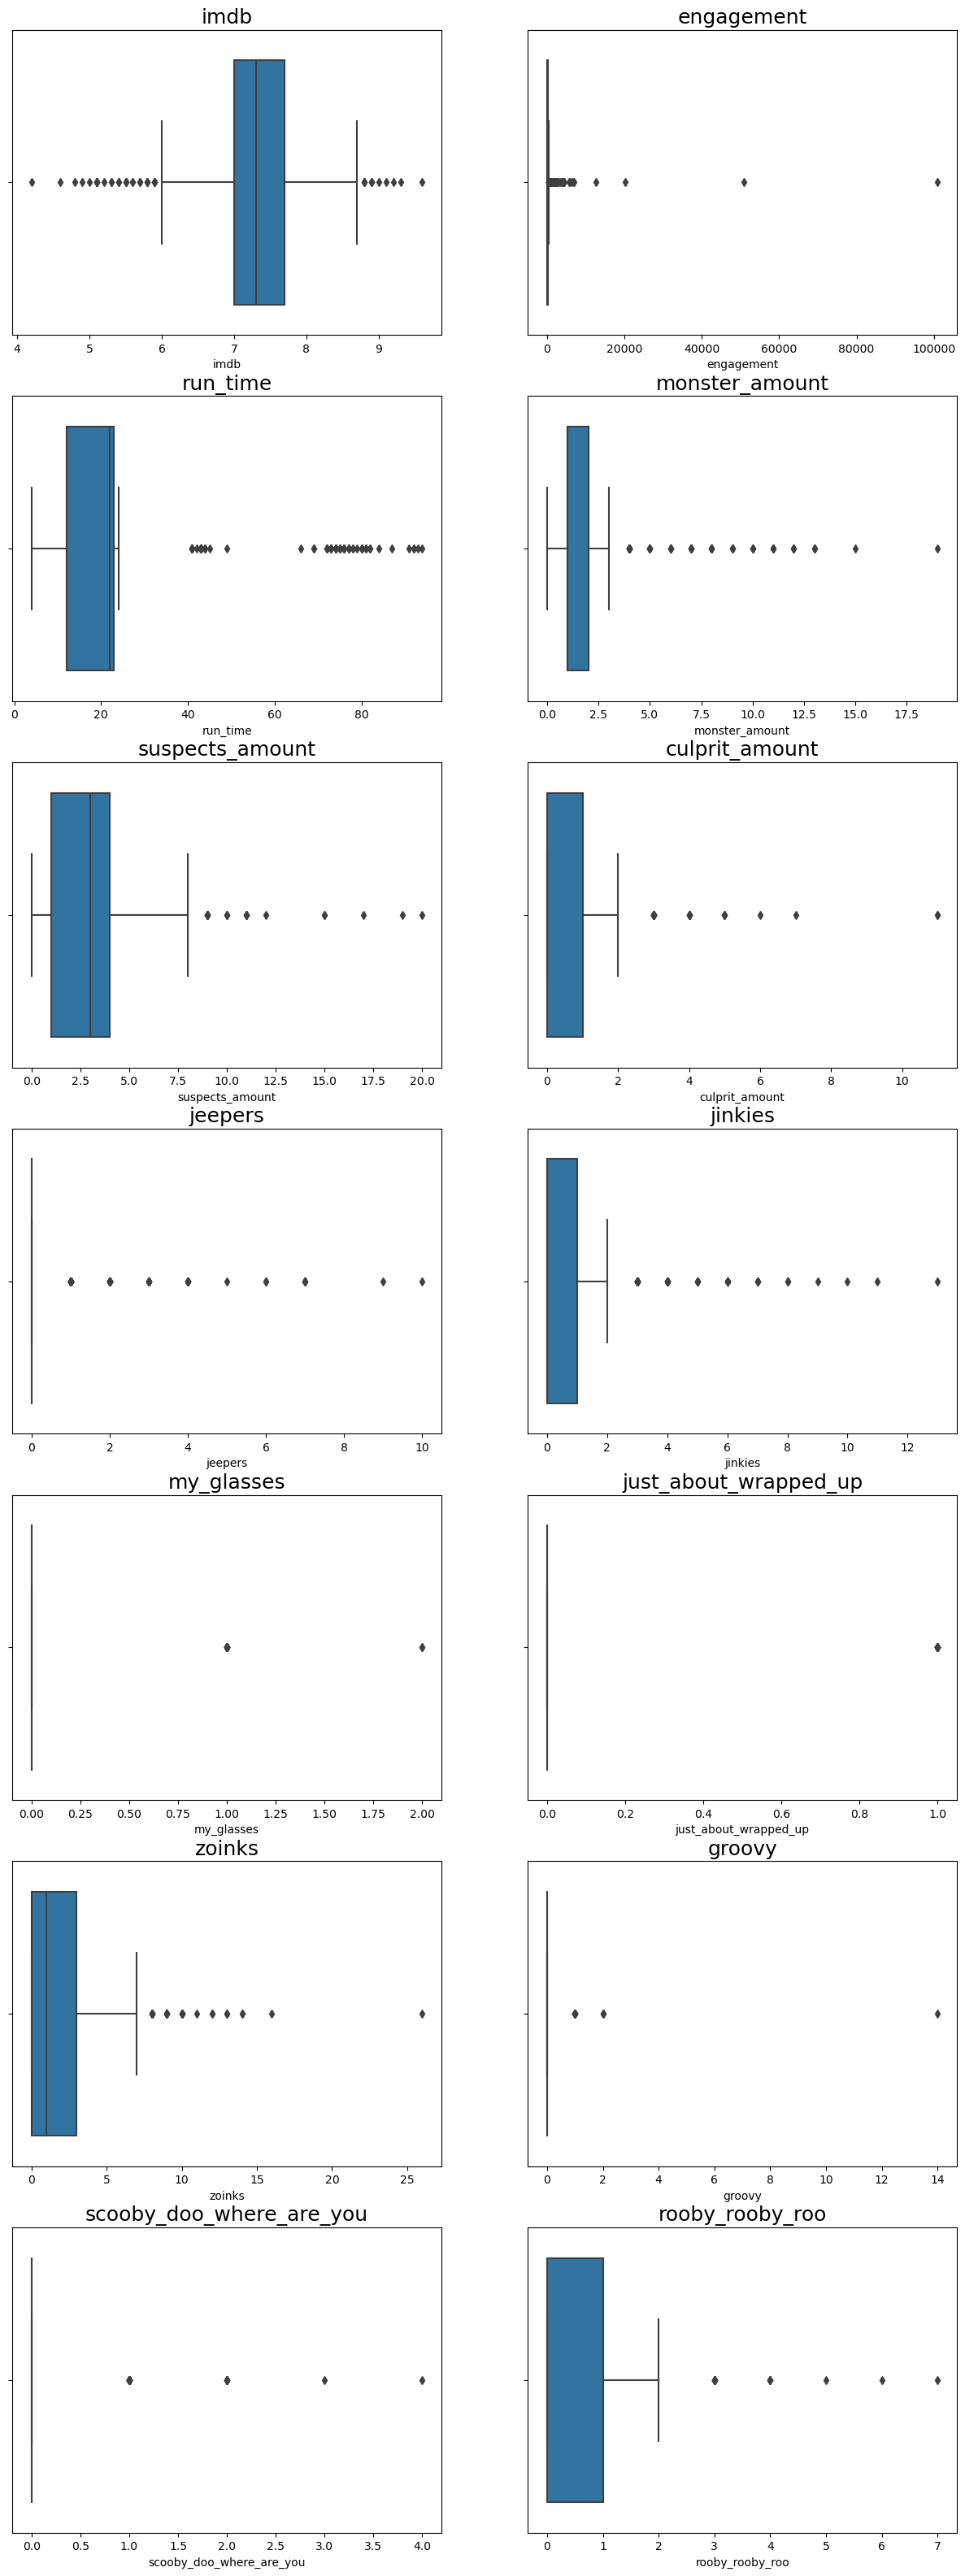

In [123]:

fig, axs = plt.subplots(nrows=int(np.ceil(len(numeric_cols)/2)), ncols=2, figsize=(15, 40))
for i,col_name in enumerate(numeric_cols):
    row = i//2
    col = i%2
    boxplot=sns.boxplot(data=numeric_df, x=col_name,ax=axs[row][col])
    boxplot.set_title(col_name,fontsize=18)

Na razie pozostawiam wartości odstające.

Sprawdzenie czy oceny imdb są mniejsze niż 1 lub wieksze od 10, jeśli by była wykraczałaby ona poza zakres oceny.

In [124]:
len(scoobydoo_noNA[(scoobydoo_noNA['imdb']<1) | (scoobydoo_noNA['imdb']>10)] )

0

## Analiza danych

Posortwanie odcinków według ocen.

In [49]:
scoobydoo_noNA.sort_values('imdb', ascending=False)[:10]

,series_name,network,season,title,imdb,engagement,date_aired,run_time,format,monster_name,monster_gender,monster_type,monster_subtype,monster_species,monster_real,monster_amount,caught_fred,caught_daphnie,caught_velma,caught_shaggy,caught_scooby,captured_fred,captured_daphnie,captured_velma,captured_shaggy,captured_scooby,unmask_fred,unmask_daphnie,unmask_velma,unmask_shaggy,unmask_scooby,snack_fred,snack_daphnie,snack_velma,snack_shaggy,snack_scooby,unmask_other,caught_other,caught_not,trap_work_first,setting_terrain,setting_country_state,suspects_amount,non_suspect,arrested,culprit_name,culprit_gender,culprit_amount,motive,if_it_wasnt_for,and_that,door_gag,number_of_snacks,split_up,another_mystery,set_a_trap,jeepers,jinkies,my_glasses,just_about_wrapped_up,zoinks,groovy,scooby_doo_where_are_you,rooby_rooby_roo,batman,scooby_dum,scrappy_doo,hex_girls,blue_falcon,fred_va,daphnie_va,velma_va,shaggy_va,scooby_va
level_0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
552,Supernatural,The CW,Crossover,Scoobynatural,9.6,6929.0,2018-03-29,42.0,Crossover,"Phantasm,Ghost Kid","Male,Male","Undead,Undead","Phantasm,Ghost","Human,Human",True,2,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,Rural,United States,6,False,True,Jay,Male,1,Competition,those meddling kids,None,True,0,1.0,1.0,0.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,False,False,False,False,False,Frank Welker,Grey DeLisle,Kate Micucci,Matthew Lillard,Frank Welker
482,Scooby-Doo Mystery Incorporated,Cartoon Network,2,Come Undone,9.3,260.0,2013-04-05,22.0,TV Series,"Evil Entity,Minions","Male,Male","Mythical,Ancient","Evil,Humanoid","Element,Human",True,2,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,None,Urban,California,0,False,True,None,None,0,Conquer,None,None,False,0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,2.0,0.0,1.0,1.0,False,False,False,False,False,Frank Welker,Grey DeLisle,Mindy Cohn,Matthew Lillard,Frank Welker
450,Scooby-Doo Mystery Incorporated,Cartoon Network,1,All Fear the Freak,9.2,272.0,2011-07-26,23.0,TV Series,Freak of Crystal Cove,Male,Ancient,Humanoid,Beast,False,1,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,None,Urban,California,3,False,True,Mayor Fred Jones Sr.,Male,1,Theft,you my meddling Fred,None,False,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,False,False,False,False,False,Frank Welker,Grey DeLisle,Mindy Cohn,Matthew Lillard,Frank Welker
463,Scooby-Doo Mystery Incorporated,Cartoon Network,2,Night Terrors,9.1,202.0,2012-08-10,23.0,TV Series,Fiend,Male,Mythical,Anubis,Human,False,1,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,Mountain,United States,3,False,True,Dan Fluunk,Male,1,Competition,you meddling snow-bound brats,None,False,0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,False,False,False,False,False,Frank Welker,Grey DeLisle,Mindy Cohn,Matthew Lillard,Frank Welker
481,Scooby-Doo Mystery Incorporated,Cartoon Network,2,Through the Curtain,9.0,184.0,2013-04-05,22.0,TV Series,Evil Entity,Male,Mythical,Evil,Element,True,1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,None,Cave,California,0,False,True,None,None,0,Conquer,None,None,False,0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,False,False,False,False,False,Frank Welker,Grey DeLisle,Mindy Cohn,Matthew Lillard,Frank Welker
466,Scooby-Doo Mystery Incorporated,Cartoon Network,2,Wrath of the Krampus,8.9,207.0,2012-08-15,22.0,TV Series,Krampus,Male,Mythical,Beast,Krampus,False,1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,Urban,California,1,Fals

### Zaangażowanie

In [50]:
scoobydoo_sort_engagement=scoobydoo_noNA.sort_values('engagement', ascending=False)[:15]

In [51]:
format_bar=scoobydoo_sort_engagement['format'].value_counts()

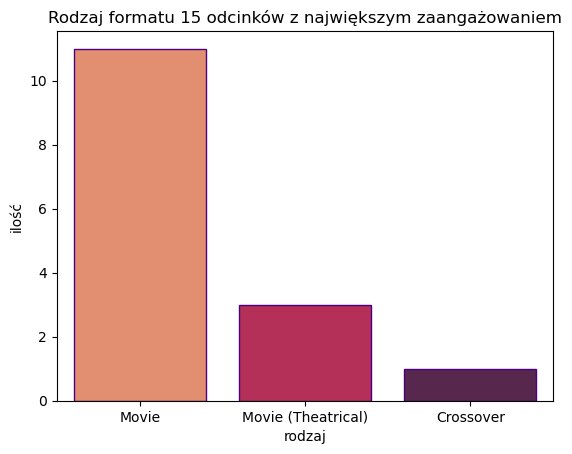

In [109]:
plt.figure()
sns.barplot(x = format_bar.index, y = format_bar, palette ="rocket_r", ec="indigo")
plt.ylabel("ilość")
plt.xlabel("rodzaj")
plt.title("Rodzaj formatu 15 odcinków z największym zaangażowaniem", fontsize=12)
plt.show()

### Ile odcinków zostało wydanych przez daną stację

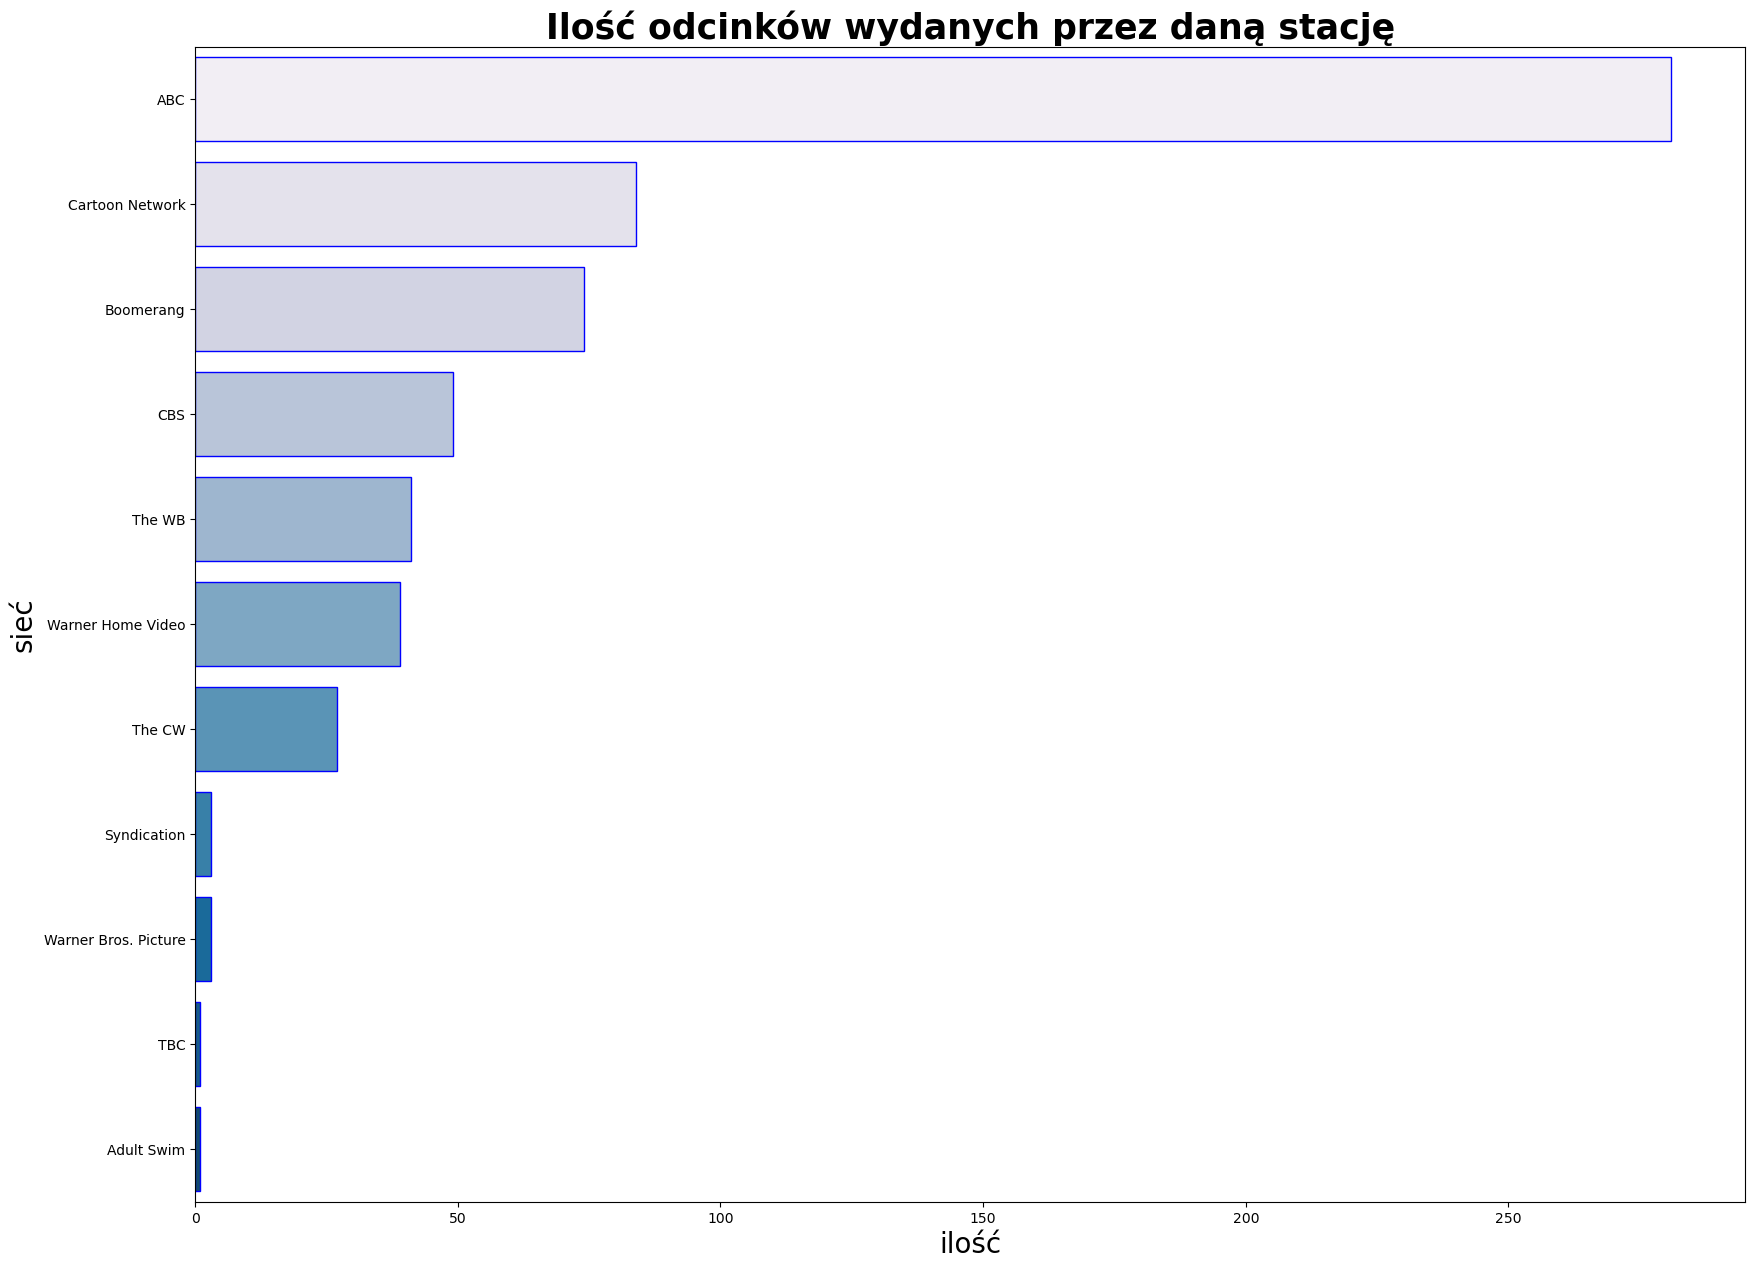

In [110]:
plt.figure(figsize=(20, 15))
plt.title("Ilość odcinków wydanych przez daną stację", fontweight='bold', fontsize=25)
sns.countplot(data=scoobydoo_noNA, y='network',palette="PuBu",order = scoobydoo_noNA['network'].value_counts().index,ec = "blue",)
plt.xlabel('ilość',fontsize=20)
plt.ylabel('sieć',fontsize=20)
plt.show()

### Częstotliwość poszczególnych fraz na odcinek

In [54]:
scoobydoo_noNA.columns.get_loc("jeepers")

56

In [55]:
scoobydoo_noNA.columns.get_loc("rooby_rooby_roo")

63

In [56]:
catch_phrases=scoobydoo_noNA.iloc[:,56:64]
catch_phrases['runtime']=scoobydoo_noNA['run_time']
catch_phrases_freq=df = catch_phrases.div(catch_phrases["runtime"], axis=0)

catch_phrases_freq.head()

,jeepers,jinkies,my_glasses,just_about_wrapped_up,zoinks,groovy,scooby_doo_where_are_you,rooby_rooby_roo,runtime
level_0,,,,,,,,,
0,0.0,0.0,0.047619,0.0,0.047619,0.000000,0.000000,0.047619,1.0
1,0.0,0.0,0.000000,0.0,0.136364,0.000000,0.045455,0.000000,1.0
2,0.0,0.0,0.000000,0.0,0.047619,0.095238,0.000000,0.000000,1.0
3,0.0,0.0,0.000000,0.0,0.095238,0.047619,0.000000,0.000000,1.0
4,0.0,0.0,0.047619,0.0,0.000000,0.000000,0.047619,0.000000,1.0


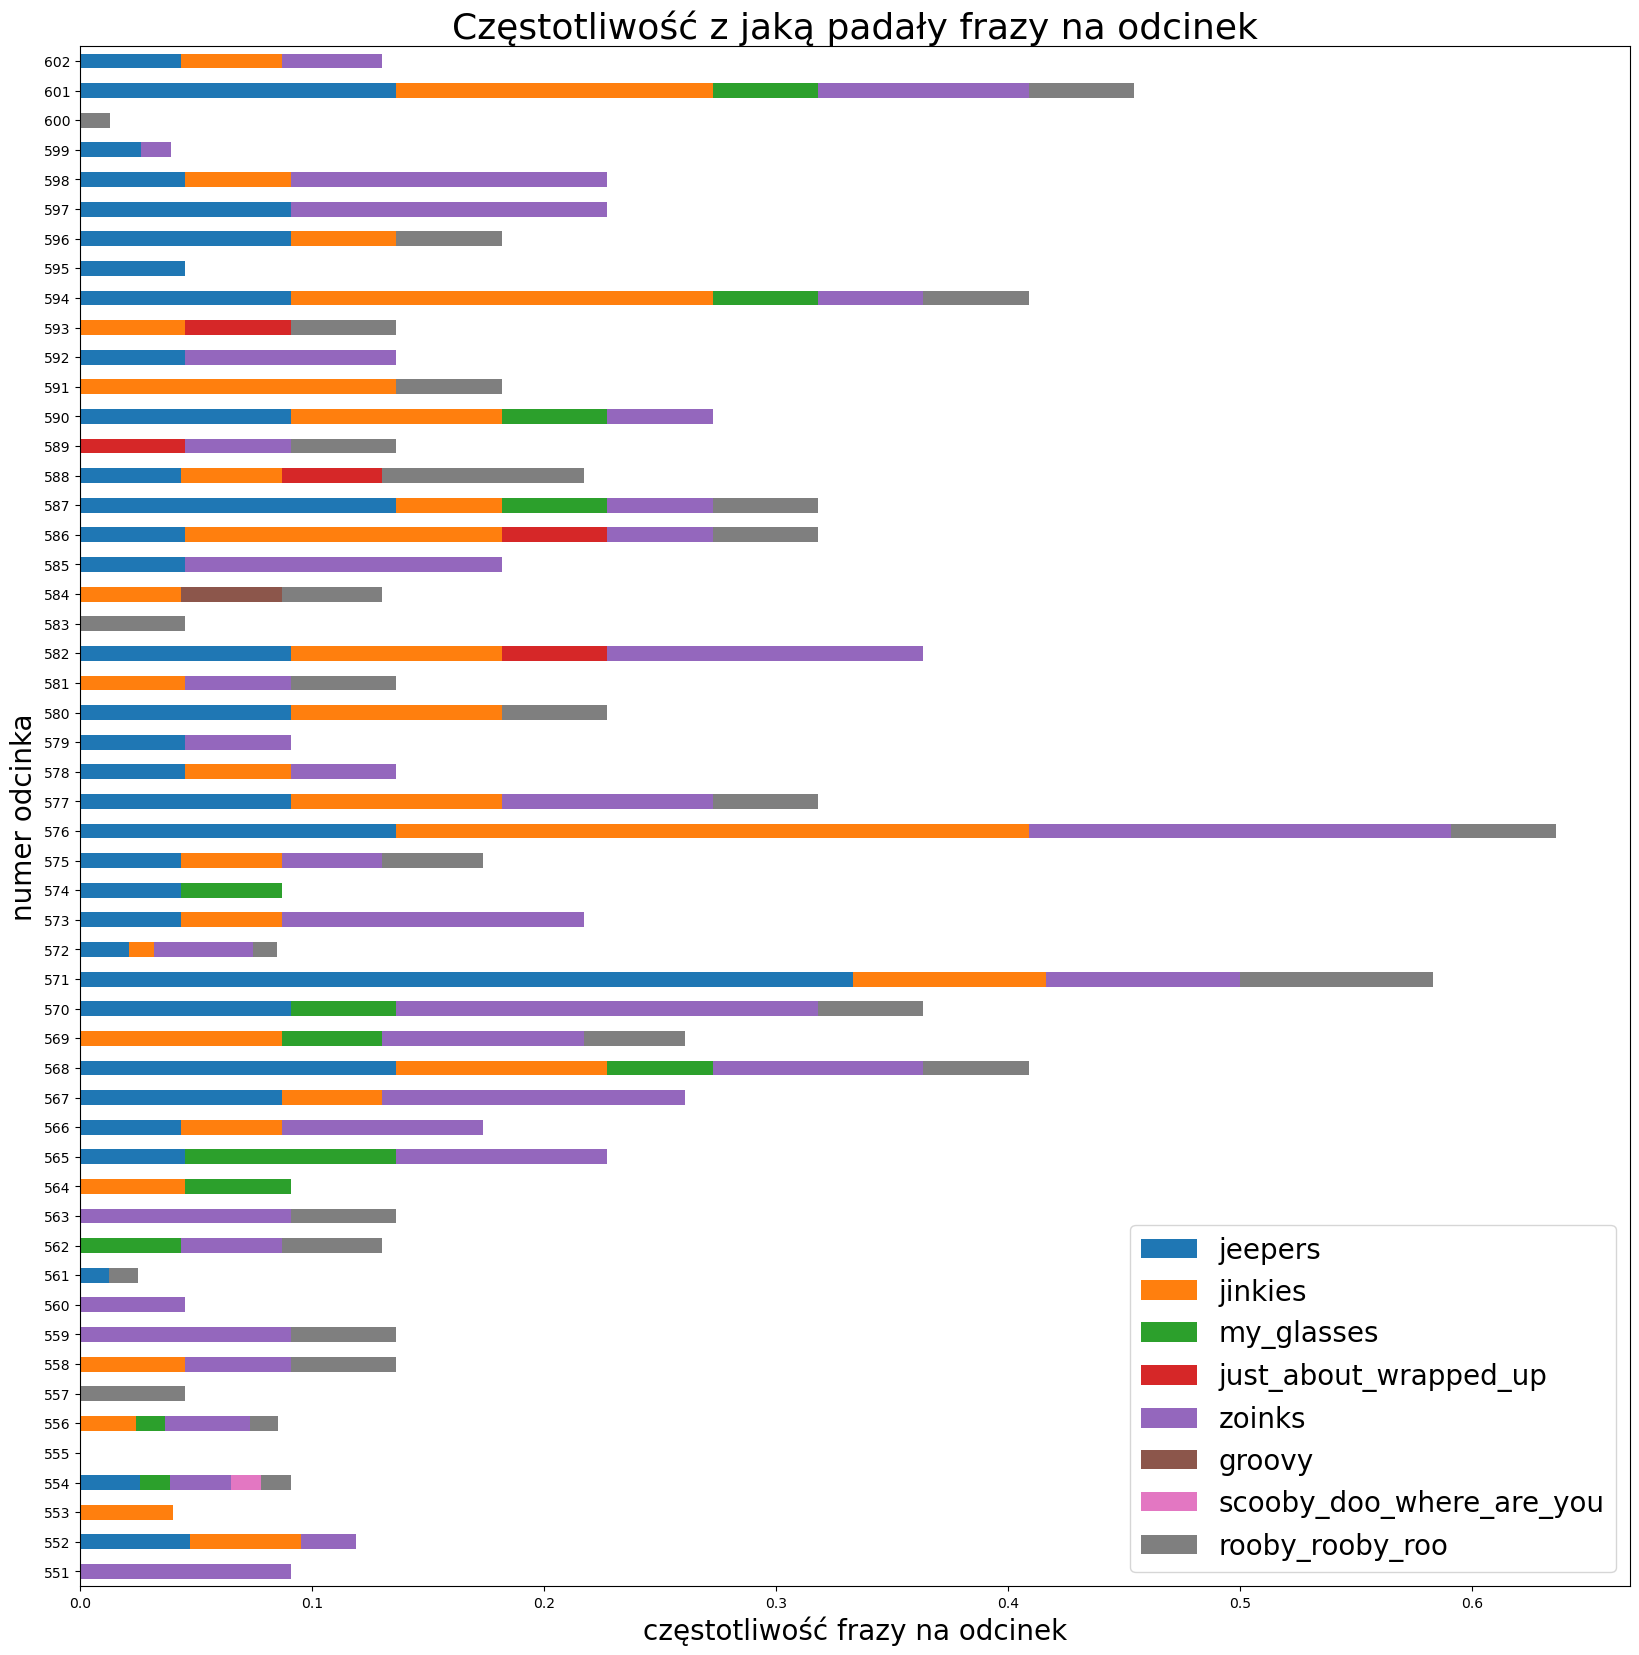

In [57]:
catch_phrases_freq.iloc[551:603,:-1].plot.barh( stacked=True, figsize=(20, 20), )
plt.ylabel("numer odcinka",fontsize=20)
plt.xlabel("częstotliwość frazy na odcinek",fontsize=20)
plt.title("Częstotliwość z jaką padały frazy na odcinek",fontsize=26)
plt.legend(fontsize=20)

Wykres jest dla 51 ostatnich odcinków czy filmów.

### Przez kogo zostały złapane potwory?

In [58]:
fred_caught=scoobydoo_noNA['caught_fred'].value_counts()
daphnie_caught=scoobydoo_noNA['caught_daphnie'].value_counts()
velma_caught=scoobydoo_noNA['caught_velma'].value_counts()
shaggy_caught=scoobydoo_noNA['caught_shaggy'].value_counts()
scooby_caught=scoobydoo_noNA['caught_scooby'].value_counts()

In [59]:
scooby_caught

False    435
True     168
Name: caught_scooby, dtype: int64

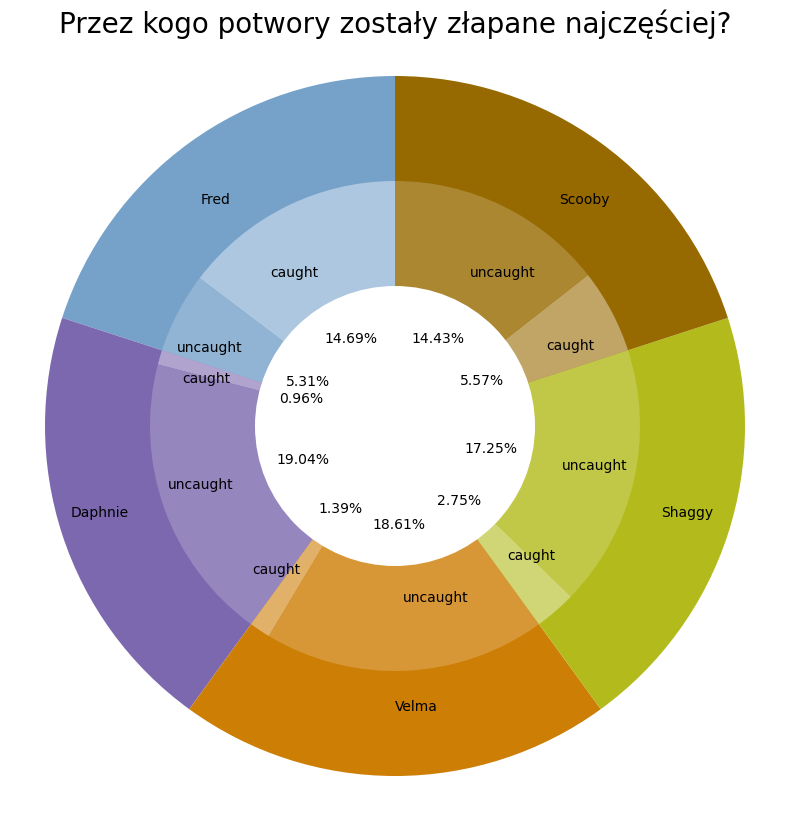

In [112]:
plt.figure(figsize=(8, 8)) 

labels = ['Fred','Daphnie','Velma','Shaggy','Scooby']
sizes = [fred_caught.sum(),daphnie_caught.sum(),velma_caught.sum(),shaggy_caught.sum(),scooby_caught.sum()]
colors = ['#76a2ca', '#7c68ae','#cd7e05','#b2bb1b','#966a00'] 

textprops = {'fontsize':14,'color':'black'}
labels_subgroup = ['caught', 'uncaught', 'caught', 'uncaught', 'caught', 'uncaught', 'caught', 'uncaught','caught', 'uncaught']
sizes_subgroup = [fred_caught[0], fred_caught[1], daphnie_caught[1],daphnie_caught[0], velma_caught[1], velma_caught[0],
                 shaggy_caught[1],shaggy_caught[0],scooby_caught[1],scooby_caught[0]]
colors_subgroup = ['#acc7df', '#91b4d4', '#b0a4ce', '#9686be',
 '#e1b169', '#d79736','#d0d676','#c1c848','#c0a566','#ab8732']
 
outside_donut = plt.pie(sizes, labels=labels, colors=colors, startangle=90, labeldistance=0.8)

inside_donut = plt.pie(sizes_subgroup, labels=labels_subgroup, colors=colors_subgroup, radius=0.7,
 startangle=90, labeldistance=0.7, autopct='%.2f%%', pctdistance =0.4)

centre_circle = plt.Circle((0, 0), 0.4, color='white', linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
 
plt.axis('equal')
plt.tight_layout()
plt.title('Przez kogo potwory zostały złapane najczęściej?', fontsize=20)
plt.show()

### One hot encoding dla zmiennych kategorycznych z wartościami unikalnymi mniejszymi od 16

In [141]:
scoobydoo_object=scoobydoo_noNA.select_dtypes("object")
scoobydoo_nunique_under_16=scoobydoo_object.loc[:, scoobydoo_object.nunique() < 16]

scoobydoo_noNA=pd.get_dummies(scoobydoo_noNA, columns=scoobydoo_nunique_under_16.columns)
scoobydoo_noNA.head()

,series_name,title,imdb,engagement,date_aired,run_time,monster_name,monster_gender,monster_type,monster_subtype,monster_species,monster_amount,caught_fred,caught_daphnie,caught_velma,caught_shaggy,caught_scooby,captured_fred,captured_daphnie,captured_velma,captured_shaggy,captured_scooby,unmask_fred,unmask_daphnie,unmask_velma,unmask_shaggy,unmask_scooby,snack_fred,snack_daphnie,snack_velma,snack_shaggy,snack_scooby,unmask_other,caught_other,caught_not,setting_country_state,suspects_amount,culprit_name,culprit_gender,culprit_amount,motive,if_it_wasnt_for,and_that,door_gag,number_of_snacks,jeepers,jinkies,my_glasses,just_about_wrapped_up,zoinks,groovy,scooby_doo_where_are_you,rooby_rooby_roo,batman,scooby_dum,scrappy_doo,hex_girls,blue_falcon,network_ABC,network_Adult Swim,network_Boomerang,network_CBS,network_Cartoon Network,network_Syndication,network_TBC,network_The CW,network_The WB,network_Warner Bros. Picture,network_Warner Home Video,season_1,season_2,season_3,season_4,season_Crossover,season_Movie,season_Special,format_Crossover,format_Movie,format_Movie (Theatrical),format_TV Series,format_TV Series (segmented),monster_real_False,monster_real_True,monster_real_None,trap_work_first_False,trap_work_first_True,trap_work_first_None,setting_terrain_Air,setting_terrain_Cave,setting_terrain_Coast,setting_terrain_Desert,setting_terrain_Forest,setting_terrain_Island,setting_terrain_Jungle,setting_terrain_Moon,setting_terrain_Mountain,setting_terrain_Ocean,setting_terrain_Rural,setting_terrain_Snow,setting_terrain_Space,setting_terrain_Swamp,setting_terrain_Urban,non_suspect_False,non_suspect_True,non_suspect_None,arrested_False,arrested_True,arrested_None,split_up_0.0,split_up_1.0,split_up_2.0,split_up_None,another_mystery_0.0,another_mystery_1.0,another_mystery_2.0,another_mystery_3.0,another_mystery_None,set_a_trap_0.0,set_a_trap_1.0,set_a_trap_2.0,set_a_trap_None,fred_va_Carl Steven,fred_va_Frank Welker,fred_va_Freddie Prinze Jr.,fred_va_None,fred_va_Robbie Amell,fred_va_Zac Efron,daphnie_va_Amanda Seyfried,daphnie_va_Grey DeLisle,daphnie_va_Heather North,daphnie_va_Kate Melton,daphnie_va_Kellie Martin,daphnie_va_Marry Kay Bergman,daphnie_va_None,daphnie_va_Sarah Jeffery,daphnie_va_Sarah Michelle Gellar,daphnie_va_Stefanianna Christopherson,velma_va_B.J. Ward,velma_va_Christina Lange,velma_va_Gina Rodriuez,velma_va_Hayley Kiyoko,velma_va_Kate Micucci,velma_va_Linda Cardellini,velma_va_Marla Scott,velma_va_Mindy Cohn,velma_va_Nicole Jaffe,velma_va_None,velma_va_Pat Stevens,velma_va_Sarah Gilman,velma_va_Stephanie D'Abruzzo,shaggy_va_Billy West,shaggy_va_Casey Kasem,shaggy_va_Matthew Lillard,shaggy_va_Nick Palatas,shaggy_va_None,shaggy_va_Scott Innes,shaggy_va_Scott Menville,shaggy_va_Will Forte,scooby_va_Don Messick,scooby_va_Frank Welker,scooby_va_Hadley Kay,scooby_va_Neil Fanning,scooby_va_None,scooby_va_Scott Innes
level_0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,"Scooby Doo, Where Are You!",What a Night for a Knight,8.1,556.0,1969-09-13,21.0,Black Knight,Male,Possessed Object,Suit,Object,1,False,False,False,True,True,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,United States,2,Mr. Wickles,Male,1,Theft,None,None,False,2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,False,False,False,False,False,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
1,"Scooby Doo, Where Are You!",A Clue for Scooby Doo,8.1,479.0,1969-09-20,22.0,Ghost of Cptn. Cuttler,Male,Ghost,Suit,Human,1,False,False,False,True,False,True,True,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,United States,2,Cptn. Cuttler,Male,1,Theft,None,None,False,1,0.0,0.0,0.0,0.0,3.0,0.0,1.0,0.0,False,F

### Korelacje

In [195]:
corr=np.round(scoobydoo_noNA.corr(method='pearson').unstack().sort_values(ascending=False),3)
corr


imdb                                   imdb                                     1.000
format_Movie (Theatrical)              network_Warner Bros. Picture             1.000
setting_terrain_Air                    setting_terrain_Air                      1.000
trap_work_first_None                   trap_work_first_None                     1.000
trap_work_first_True                   trap_work_first_True                     1.000
trap_work_first_False                  trap_work_first_False                    1.000
monster_real_None                      monster_real_None                        1.000
monster_real_True                      monster_real_True                        1.000
monster_real_False                     monster_real_False                       1.000
format_TV Series (segmented)           format_TV Series (segmented)             1.000
format_TV Series                       format_TV Series                         1.000
format_Movie (Theatrical)              format_Movie (T

Korelacje ze zmienną format_Movie w wybranym zakresie

In [207]:
corr[(corr>0.2) & (corr<1)]['format_Movie']

season_Movie                    0.911
run_time                        0.840
network_Warner Home Video       0.792
suspects_amount                 0.558
rooby_rooby_roo                 0.315
jinkies                         0.301
network_Syndication             0.255
groovy                          0.241
zoinks                          0.235
culprit_amount                  0.231
jeepers                         0.217
daphnie_va_Marry Kay Bergman    0.216
scooby_va_Scott Innes           0.211
daphnie_va_Kate Melton          0.208
velma_va_Hayley Kiyoko          0.208
shaggy_va_Nick Palatas          0.208
fred_va_Robbie Amell            0.208
another_mystery_2.0             0.208
another_mystery_1.0             0.206
dtype: float64

## Regresja liniowa

In [231]:
x=scoobydoo_noNA[corr[(corr>0.2) & (corr<1)]['format_Movie'].index].values
y=scoobydoo_noNA['format_Movie'].values.ravel()
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

regressor = LinearRegression()
regressor.fit(X_train,y_train)

y_pred=regressor.predict(X_test)
r2_score(y_test, y_pred)

0.9735642423801568

R^2 wynosi 0.97, co oznacza że model jest dobrze dopasowany do danych.

## KNN

In [232]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)

knn.score(X_test, y_test)

0.988950276243094

Dokładność wynosi 98%, knn poradził sobie lepiej od regresji liniowej.